In [14]:
import pandas as pd
import numpy as np
from pathlib import Path
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset.csv")
df.shape

(162, 16)

### Remove independent features with high correlation

In [ ]:
import pandas as pd

def finalize_features(input_filepath: str, output_filepath: str) -> None:
    """
    Loads the master dataset and removes specified columns to finalize the
    set of predictor variables, avoiding multicollinearity.

    Args:
        input_filepath (str): The file path for the master dataset.
        output_filepath (str): The file path to save the finalized dataset.
    """
    try:
        # --- 1. Load the Master Dataset ---
        df = pd.read_csv(input_filepath)
        print("Original dataset loaded successfully.")
        print(f"Original number of columns: {len(df.columns)}")

        # --- 2. Define Columns to Remove ---
        # These columns were identified as causing multicollinearity issues.
        cols_to_remove = ['Diesel_Price', 'Bank_Rate']
        
        # Check which of these columns actually exist in the dataframe to avoid errors
        existing_cols_to_remove = [col for col in cols_to_remove if col in df.columns]

        # --- 3. Drop the Columns ---
        df_final = df.drop(columns=existing_cols_to_remove)
        
        print(f"\nRemoved the following columns: {existing_cols_to_remove}")
        print(f"Final number of columns: {len(df_final.columns)}")

        # --- 4. Save the Finalized Dataset ---
        df_final.to_csv(output_filepath, index=False)
        
        print(f"\nFinalized dataset saved to '{output_filepath}'")
        print("\n--- Final list of columns: ---")
        print(df_final.columns.tolist())
        
    except FileNotFoundError:
        print(f"Error: The master dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Execute the function ---
if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset.csv"
    OUTPUT_FILE = "master_dataset_final_features.csv"
    finalize_features(INPUT_FILE, OUTPUT_FILE)

Original dataset loaded successfully.
Original number of columns: 16

Removed the following columns: ['Diesel_Price', 'Bank_Rate']
Final number of columns: 14

Finalized dataset saved to 'master_dataset_final_features.csv'

--- Final list of columns: ---
['date', 'BEV_Registrations', 'Total_Vehicle_Registrations', 'BEV_Share', 'Charging_Infrastructure', 'RHDI_per_head', 'CPI', 'Petrol_Price', 'PiCG_Amount_GBP', 'picg_active', 'GT_Awareness_General', 'GT_Awareness_Consideration', 'GT_Infrastructure_Concern', 'GT_Range_Anxiety']


### Create new Google Trends variable by applying PCA on existing Google Trends variable

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def create_pca_index(input_filepath: str, output_filepath: str) -> None:
    """
    Applies Principal Component Analysis (PCA) to the Google Trends variables
    to create a single index, then adds it to the dataset and removes the
    original columns.

    Args:
        input_filepath (str): File path for the dataset with final features.
        output_filepath (str): File path to save the dataset with the new PCA index.
    """
    try:
        # --- 1. Load the Dataset ---
        df = pd.read_csv(input_filepath)
        print("Dataset with final features loaded successfully.")

        # --- 2. Isolate and Scale the Google Trends Data ---
        gt_cols = [
            'GT_Awareness_General',
            'GT_Awareness_Consideration',
            'GT_Infrastructure_Concern',
            'GT_Range_Anxiety'
        ]
        gt_data = df[gt_cols]

        # PCA is sensitive to scale, so we standardize the data first
        scaler = StandardScaler()
        gt_data_scaled = scaler.fit_transform(gt_data)

        # --- 3. Apply Principal Component Analysis (PCA) ---
        # We want to distill the information into a single index (n_components=1)
        pca = PCA(n_components=1)
        
        # Fit PCA to the scaled data and get the principal component
        gt_index = pca.fit_transform(gt_data_scaled)
        
        print("\nPCA applied successfully to create a single 'GT_Index'.")

        # --- 4. Add the New Index and Remove Old Columns ---
        df_pca = df.copy()
        df_pca['GT_Index'] = gt_index
        
        # Drop the original, highly correlated Google Trends columns
        df_pca.drop(columns=gt_cols, inplace=True)
        
        print("Original Google Trends columns removed and replaced with 'GT_Index'.")

        # --- 5. Save the Final Dataset ---
        df_pca.to_csv(output_filepath, index=False)
        
        print(f"\nFinal dataset with PCA index saved to '{output_filepath}'")
        print("\n--- First 5 rows of the new dataset: ---")
        print(df_pca.head())
        
    except FileNotFoundError:
        print(f"Error: The dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Execute the function ---
if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset.csv"
    OUTPUT_FILE = "master_dataset_pca_features.csv"
    create_pca_index(INPUT_FILE, OUTPUT_FILE)

Dataset with final features loaded successfully.

PCA applied successfully to create a single 'GT_Index'.
Original Google Trends columns removed and replaced with 'GT_Index'.

Final dataset with PCA index saved to 'master_dataset_pca_features.csv'

--- First 5 rows of the new dataset: ---
         date  BEV_Registrations  Total_Vehicle_Registrations  BEV_Share  \
0  2011-01-31                 54                       424100   0.000127   
1  2011-02-28                 36                       360400   0.000100   
2  2011-03-31                320                       662000   0.000483   
3  2011-04-30                320                       434400   0.000737   
4  2011-05-31                 38                       447300   0.000085   

   Charging_Infrastructure  RHDI_per_head   CPI  Petrol_Price  \
0                        0      5129.0000  91.3        127.40   
1                        0      5088.0000  92.0        129.00   
2                        0      5047.0000  92.2        132

In [ ]:
df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset_pca_features.csv")
df.head(10)

,date,BEV_Registrations,Total_Vehicle_Registrations,BEV_Share,Charging_Infrastructure,RHDI_per_head,CPI,Petrol_Price,PiCG_Amount_GBP,picg_active,GT_Index
0,2011-01-31,54,424100,0.000127,0,5129.0000,91.3,127.40,5000.0,1,-1.574771
1,2011-02-28,36,360400,0.000100,0,5088.0000,92.0,129.00,5000.0,1,-2.017975
2,2011-03-31,320,662000,0.000483,0,5047.0000,92.2,132.25,5000.0,1,-1.719808
3,2011-04-30,320,434400,0.000737,0,5063.3333,93.2,134.29,5000.0,1,-2.017975
4,2011-05-31,38,447300,0.000085,0,5079.6667,93.4,136.28,5000.0,1,-1.995205
5,2011-06-30,218,479000,0.000455,0,5096.0000,93.3,135.59,5000.0,1,-2.039529
6,2011-07-31,336,429200,0.000783,0,5093.3333,93.3,134.56,5000.0,1,-2.062298
7,2011-08-31,36,357300,0.000101,0,5090.6667,93.8,135.47,5000.0,1,-2.039529
8,2011-09-30,38,629800,0.000060,0,5088.0000,94.4,135.17,5000.0,1,-2.039529
9,2011-10-31,218,431800,0.000505,0,5078.3333,94.5,134.67,5000.0,1,-2.061082


In [9]:
df.shape

(162, 11)

### Final Correlation Matrix

Correlation heatmap saved to 'correlation_heatmap_final.png'


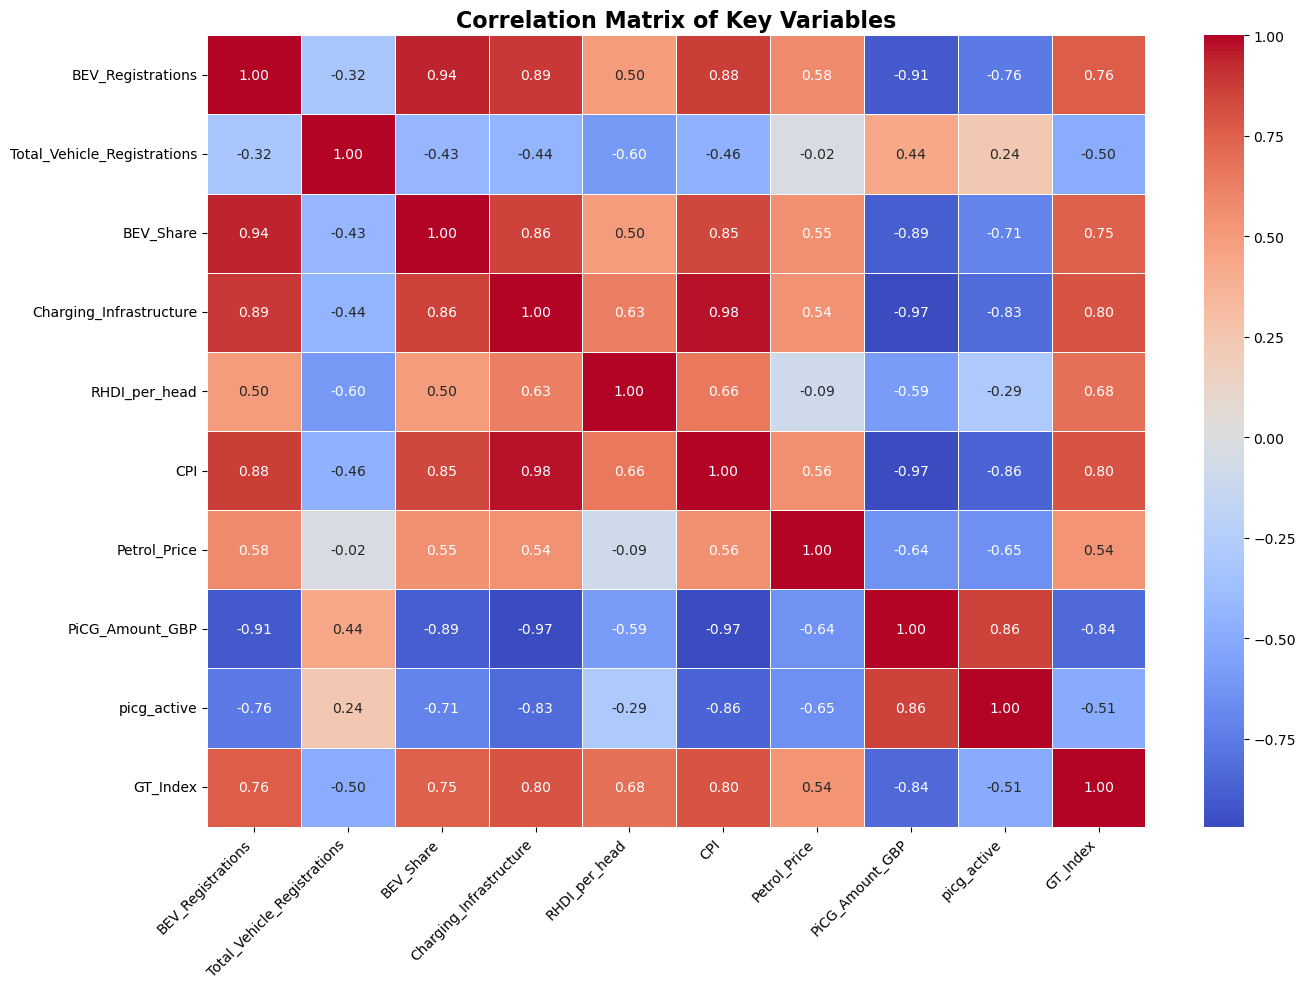

In [ ]:
def create_correlation_heatmap(input_filepath: str, output_filepath: str) -> None:
    """
    Loads the master dataset, calculates the correlation matrix for numeric
    columns, and visualizes it as a heatmap.

    Args:
        input_filepath (str): The file path for the master dataset.
        output_filepath (str): The file path to save the heatmap image.
    """
    try:
        # --- 1. Load the Master Dataset ---
        df = pd.read_csv(input_filepath)

        # --- 2. Prepare Data for Correlation ---
        # Select only the numeric columns relevant for the analysis.
        numeric_cols = [
            'BEV_Registrations', 'Total_Vehicle_Registrations', 'BEV_Share', 'Charging_Infrastructure',
            'RHDI_per_head', 'CPI', 'Petrol_Price',
            'PiCG_Amount_GBP', 'picg_active', 'GT_Index'
        ]
        df_numeric = df[numeric_cols]

        # --- 3. Calculate the Correlation Matrix ---
        corr_matrix = df_numeric.corr()

        # --- 4. Visualize the Heatmap ---
        plt.figure(figsize=(14, 10))
        sns.heatmap(
            corr_matrix,
            annot=True,          # Show the correlation values on the map
            fmt=".2f",           # Format values to two decimal places
            cmap='coolwarm',     # Use a diverging colormap
            linewidths=.5
        )
        plt.title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()

        # --- 5. Save the Visualization ---
        plt.savefig(output_filepath)
        print(f"Correlation heatmap saved to '{output_filepath}'")

    except FileNotFoundError:
        print(f"Error: The master dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Execute the function ---
if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset_pca_features.csv"
    OUTPUT_FILE = "correlation_heatmap_final.png"
    create_correlation_heatmap(INPUT_FILE, OUTPUT_FILE)

### Remove picg active due to very high correlation with Picg_Amount_GBP

In [ ]:
import pandas as pd

def finalize_features(input_filepath: str, output_filepath: str) -> None:
    """
    Loads the master dataset and removes specified columns to finalize the
    set of predictor variables, avoiding multicollinearity.

    Args:
        input_filepath (str): The file path for the master dataset.
        output_filepath (str): The file path to save the finalized dataset.
    """
    try:
        # --- 1. Load the Master Dataset ---
        df = pd.read_csv(input_filepath)
        print("Original dataset loaded successfully.")
        print(f"Original number of columns: {len(df.columns)}")

        # --- 2. Define Columns to Remove ---
        # These columns were identified as causing multicollinearity issues.
        cols_to_remove = ['picg_active']
        
        # Check which of these columns actually exist in the dataframe to avoid errors
        existing_cols_to_remove = [col for col in cols_to_remove if col in df.columns]

        # --- 3. Drop the Columns ---
        df_final = df.drop(columns=existing_cols_to_remove)
        
        print(f"\nRemoved the following columns: {existing_cols_to_remove}")
        print(f"Final number of columns: {len(df_final.columns)}")

        # --- 4. Save the Finalized Dataset ---
        df_final.to_csv(output_filepath, index=False)
        
        print(f"\nFinalized dataset saved to '{output_filepath}'")
        print("\n--- Final list of columns: ---")
        print(df_final.columns.tolist())
        
    except FileNotFoundError:
        print(f"Error: The master dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Execute the function ---
if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset_pca_features.csv"
    OUTPUT_FILE = "final_dataset.csv"
    finalize_features(INPUT_FILE, OUTPUT_FILE)

Original dataset loaded successfully.
Original number of columns: 11

Removed the following columns: ['picg_active']
Final number of columns: 10

Finalized dataset saved to 'final_dataset.csv'

--- Final list of columns: ---
['date', 'BEV_Registrations', 'Total_Vehicle_Registrations', 'BEV_Share', 'Charging_Infrastructure', 'RHDI_per_head', 'CPI', 'Petrol_Price', 'PiCG_Amount_GBP', 'GT_Index']


Correlation heatmap saved to 'final_correlation_heatmap.png'


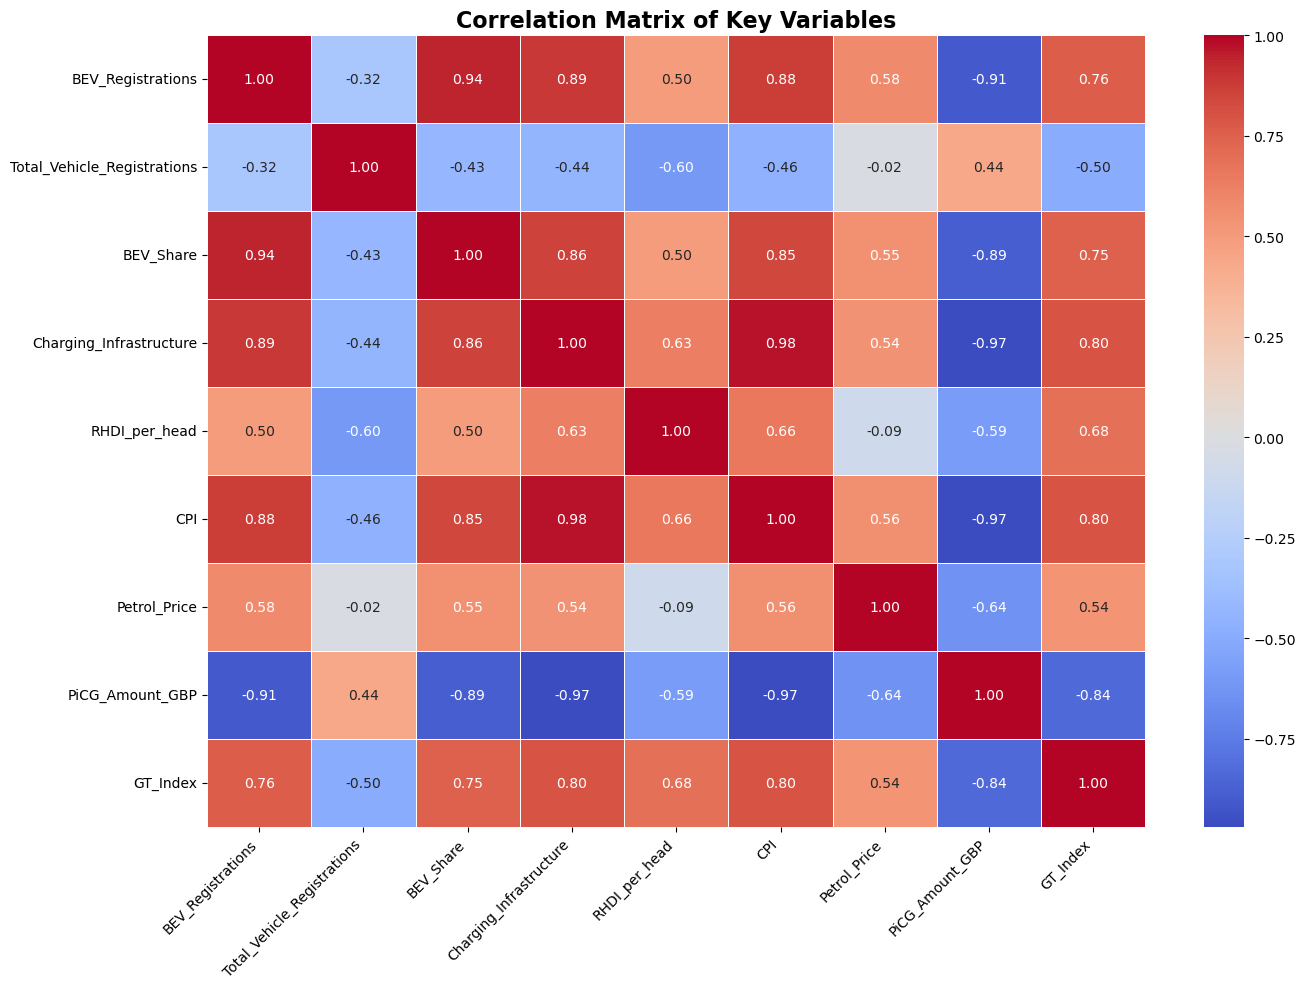

In [ ]:
def create_correlation_heatmap(input_filepath: str, output_filepath: str) -> None:
    """
    Loads the master dataset, calculates the correlation matrix for numeric
    columns, and visualizes it as a heatmap.

    Args:
        input_filepath (str): The file path for the master dataset.
        output_filepath (str): The file path to save the heatmap image.
    """
    try:
        # --- 1. Load the Master Dataset ---
        df = pd.read_csv(input_filepath)

        # --- 2. Prepare Data for Correlation ---
        # Select only the numeric columns relevant for the analysis.
        numeric_cols = [
            'BEV_Registrations', 'Total_Vehicle_Registrations', 'BEV_Share', 'Charging_Infrastructure',
            'RHDI_per_head', 'CPI', 'Petrol_Price',
            'PiCG_Amount_GBP', 'GT_Index'
        ]
        df_numeric = df[numeric_cols]

        # --- 3. Calculate the Correlation Matrix ---
        corr_matrix = df_numeric.corr()

        # --- 4. Visualize the Heatmap ---
        plt.figure(figsize=(14, 10))
        sns.heatmap(
            corr_matrix,
            annot=True,          # Show the correlation values on the map
            fmt=".2f",           # Format values to two decimal places
            cmap='coolwarm',     # Use a diverging colormap
            linewidths=.5
        )
        plt.title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()

        # --- 5. Save the Visualization ---
        plt.savefig(output_filepath)
        print(f"Correlation heatmap saved to '{output_filepath}'")

    except FileNotFoundError:
        print(f"Error: The master dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Execute the function ---
if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\final_dataset.csv"
    OUTPUT_FILE = "final_correlation_heatmap.png"
    create_correlation_heatmap(INPUT_FILE, OUTPUT_FILE)